# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'fc6dcfc9173a7be5c39edbdbd4a005ad'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [4]:
cities

['castillos',
 'choyr',
 'vorgashor',
 'la rioja',
 'nova sintra',
 'albany',
 'cabo san lucas',
 'qaqortoq',
 'saint-pierre',
 'anadyr',
 'puerto natales',
 'yellowknife',
 'port-aux-francais',
 'waitangi',
 'olonkinbyen',
 'afaahiti',
 'atafu village',
 'trinidad',
 'ancud',
 'san patricio',
 'iqaluit',
 'adamstown',
 'tual',
 'keflavik',
 'hami',
 'iskateley',
 'blackmans bay',
 'kavaratti',
 'port elizabeth',
 'luderitz',
 'bikenibeu village',
 'stanley',
 'zhengjiatun',
 'georgetown',
 'edinburgh of the seven seas',
 'selfoss',
 'ilulissat',
 'invercargill',
 'bethel',
 'road town',
 'guerrero negro',
 'grytviken',
 'vung tau',
 'faya-largeau',
 'tumaco',
 'ust-nera',
 'masterton',
 'yangor',
 'susuman',
 'ushuaia',
 'chernomorskoye',
 'longyearbyen',
 'mhamid',
 'port mathurin',
 'chonchi',
 'berdigestyakh',
 'margaret river',
 'zahedan',
 'minjur',
 'quibala',
 'gizo',
 'papatowai',
 'alotau',
 "st. john's",
 'kodiak',
 'vadamadurai',
 'ribeira grande',
 'walvis bay',
 'isafjord

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metrics&appid={weather_api_key}"
print(url + "&q=san francisco")

https://api.openweathermap.org/data/2.5/weather?units=metrics&appid=fc6dcfc9173a7be5c39edbdbd4a005ad&q=san francisco


In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metrics&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castillos
Processing Record 2 of Set 1 | choyr
Processing Record 3 of Set 1 | vorgashor
Processing Record 4 of Set 1 | la rioja
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | afaahiti
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | trinidad
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | adamstown
Processing R

In [6]:
city_data

[{'City': 'castillos',
  'Lat': -34.1667,
  'Lng': -53.8333,
  'Max Temp': 286.62,
  'Humidity': 94,
  'Cloudiness': 0,
  'Wind Speed': 1.8,
  'Country': 'UY',
  'Date': 1733887465},
 {'City': 'choyr',
  'Lat': 46.3611,
  'Lng': 108.3611,
  'Max Temp': 261.81,
  'Humidity': 66,
  'Cloudiness': 100,
  'Wind Speed': 2.53,
  'Country': 'MN',
  'Date': 1733887642},
 {'City': 'vorgashor',
  'Lat': 67.5833,
  'Lng': 63.95,
  'Max Temp': 266.65,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 6.24,
  'Country': 'RU',
  'Date': 1733887642},
 {'City': 'la rioja',
  'Lat': 42.25,
  'Lng': -2.5,
  'Max Temp': 273.03,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 1.28,
  'Country': 'ES',
  'Date': 1733887642},
 {'City': 'nova sintra',
  'Lat': 14.8667,
  'Lng': -24.7167,
  'Max Temp': 297.35,
  'Humidity': 68,
  'Cloudiness': 39,
  'Wind Speed': 9.58,
  'Country': 'CV',
  'Date': 1733887523},
 {'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 278.38,
  'Humidity

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castillos,-34.1667,-53.8333,286.62,94,0,1.80,UY,1733887465
1,choyr,46.3611,108.3611,261.81,66,100,2.53,MN,1733887642
2,vorgashor,67.5833,63.9500,266.65,95,100,6.24,RU,1733887642
3,la rioja,42.2500,-2.5000,273.03,95,100,1.28,ES,1733887642
4,nova sintra,14.8667,-24.7167,297.35,68,39,9.58,CV,1733887523


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castillos,-34.1667,-53.8333,286.62,94,0,1.80,UY,1733887465
1,choyr,46.3611,108.3611,261.81,66,100,2.53,MN,1733887642
2,vorgashor,67.5833,63.9500,266.65,95,100,6.24,RU,1733887642
3,la rioja,42.2500,-2.5000,273.03,95,100,1.28,ES,1733887642
4,nova sintra,14.8667,-24.7167,297.35,68,39,9.58,CV,1733887523


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

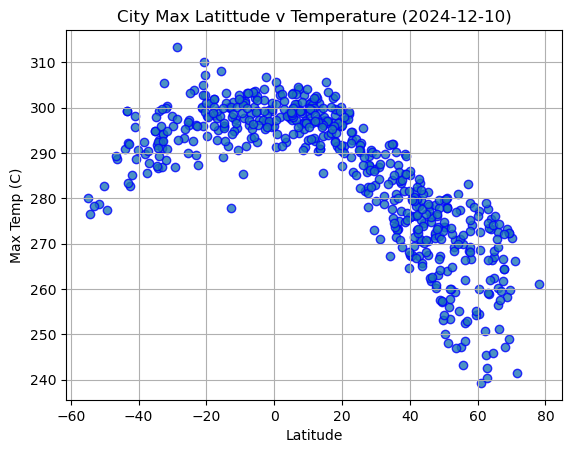

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latittude v Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

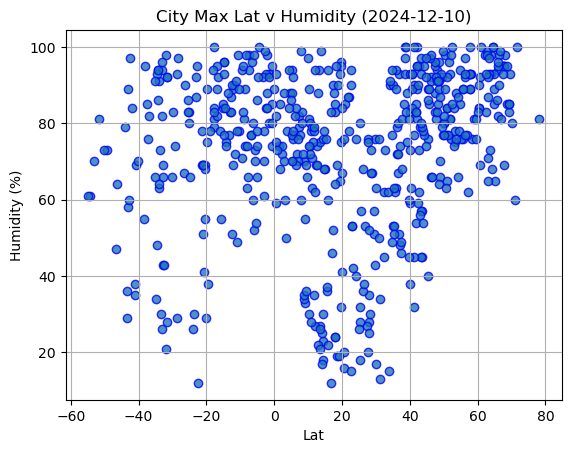

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date= time.strftime("%Y-%m-%d")
plt.title(f"City Max Lat v Humidity ({date})")
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

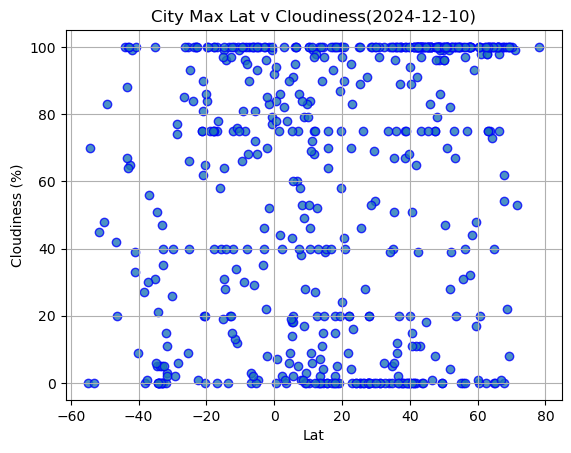

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Lat v Cloudiness({date})")
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

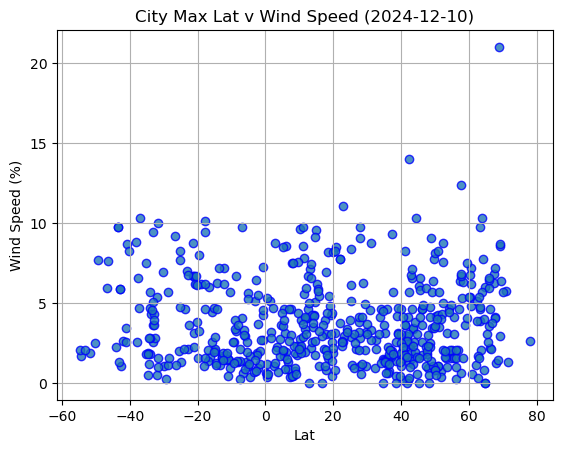

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Lat v Wind Speed ({date})")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
    

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,choyr,46.3611,108.3611,261.81,66,100,2.53,MN,1733887642
2,vorgashor,67.5833,63.9500,266.65,95,100,6.24,RU,1733887642
3,la rioja,42.2500,-2.5000,273.03,95,100,1.28,ES,1733887642
4,nova sintra,14.8667,-24.7167,297.35,68,39,9.58,CV,1733887523
5,albany,42.6001,-73.9662,278.38,95,100,2.24,US,1733887642


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castillos,-34.1667,-53.8333,286.62,94,0,1.80,UY,1733887465
8,saint-pierre,-21.3393,55.4781,299.97,69,75,8.75,RE,1733887643
10,puerto natales,-51.7236,-72.4875,278.68,81,45,1.85,CL,1733887643
12,port-aux-francais,-49.3500,70.2167,277.44,73,83,7.70,TF,1733887643
13,waitangi,-43.9535,-176.5597,290.83,79,100,2.24,NZ,1733887643


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7521198201017143


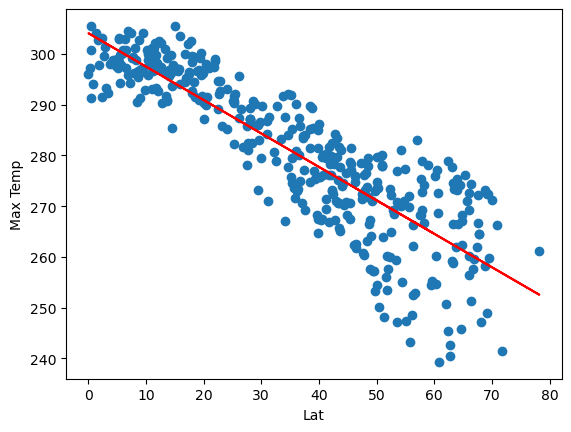

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is 0.3120171906843429


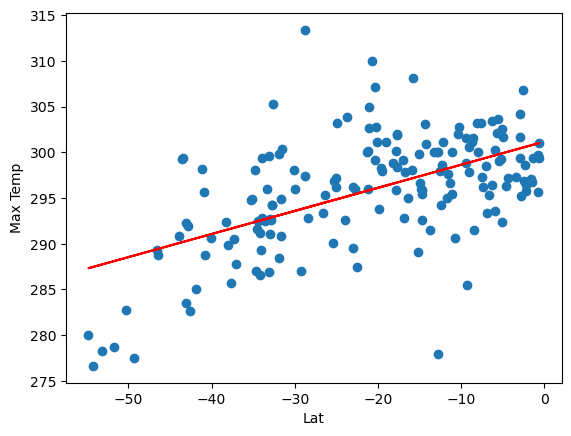

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

**Discussion about the linear relationship:** There is a strong relationship between higher latitudes and max temperature. It seems as if the higher you go in latitude the lower the max temp will be. However for the southern hemisphere, it seems to be that higher Latitude means an increase in max temp. The relationship in the southern hemisphere has less accuracy as they are less clusterd than the northern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.13922444856462043


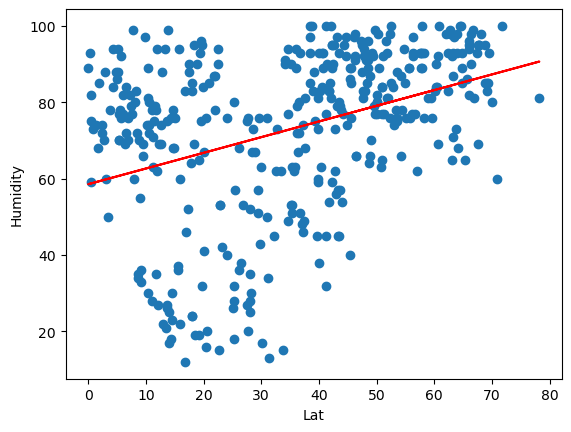

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (6,-10))

The r-value is 0.09365774267528822


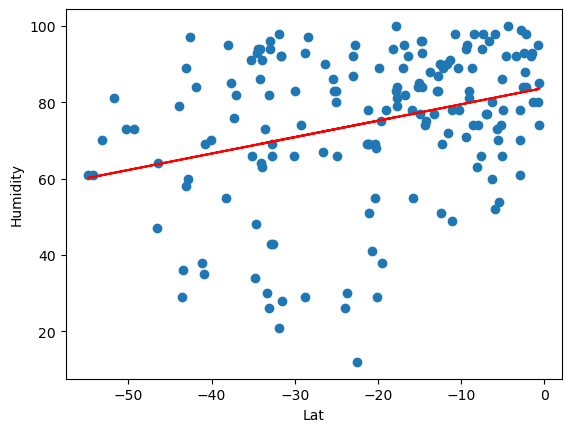

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-10,-50))

**Discussion about the linear relationship:** The Northen hemisphere graph shows that there are more clusters above the slope intercept. The higher the Latitude the higher the humidity. With the southern hemisphere, the higher the latitude the higher the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.08605707926936774


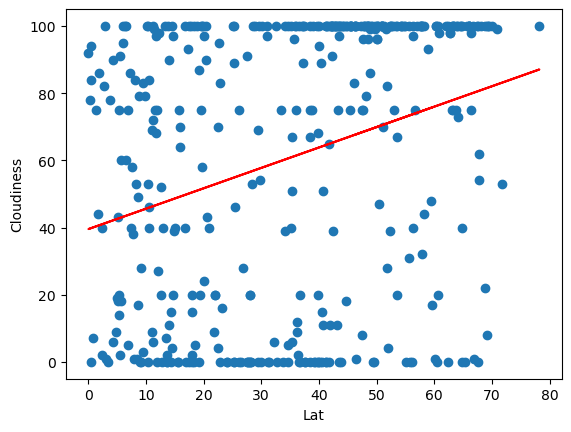

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (6,-10))

The r-value is 0.09360238982449508


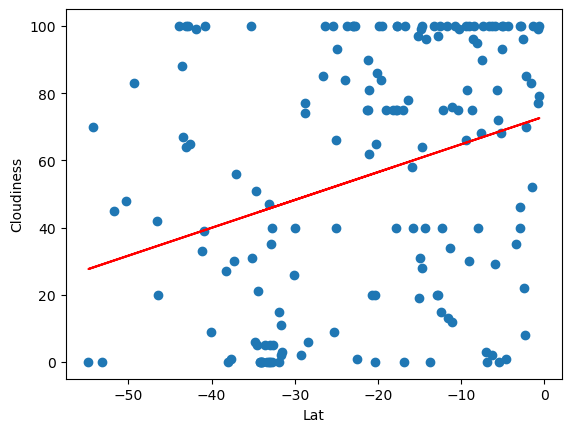

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (6,-10))

**Discussion about the linear relationship:** The graph in both does not have any coorelation between latitude and cloudiness. Cloudiness relys on topography and the weather cycle so it would make sense that latitude has no bearing on latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


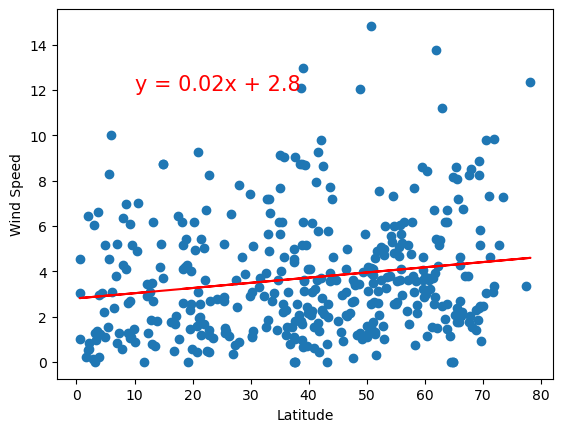

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (6,-10))

The r-value is 0.04776951162242658


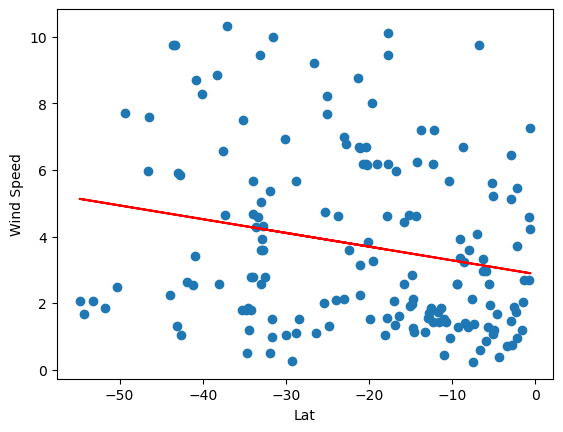

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (6,-10))

**Discussion about the linear relationship:** There is no connection between latitude and wind speed. However the wind speed for the northern hemispere seems to have a closer relation to each other than the southern hemisphere. Wind speed ususally depends on topography and are also influenced by earths rotation